# Deep learning model

In [55]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
tf.version.VERSION

'2.0.0'

## Load data

In [134]:
X = []
Y = []

In [135]:
data_path = "Data/GeneratedData/CleanData_IDD/"
base_path = os.getcwd()

for type_dir in os.listdir(data_path):
    if type_dir[0] == ".":
        continue
    type_dir_path = os.path.join(base_path, data_path, type_dir)
    for subject in os.listdir(type_dir_path):
        if subject[0] == ".":
            continue
        subject_dir_path = os.path.join(type_dir_path, subject)
        for file in os.listdir(subject_dir_path):
            if "Music" in file:
                Y.append(1)
            elif "Rest" in file:
                Y.append(0)
            X.append(np.loadtxt(os.path.join(type_dir_path, subject, file)))
        print(f"Loaded {subject} files")
        # create directory for file and populate with new data.
        # f_path = os.path.join(base_path, type_dir_path, file)
        # file_dir = file[:-4]
        # d_path = os.path.join(base_path, generated_data_path, group_dir, type_dir, file_dir)
        # generate_data(file, f_path, d_path, clip_length)

Loaded NDS001_Music_CD files
Loaded NDS007_Music_CD files
Loaded NDS006_Music_CD files
Loaded NDS003_Music_CD files
Loaded NDS002_Music_CD files
Loaded NDS004_Music_CD files
Loaded NDS005_Music_CD files
Loaded NDS002_Rest_CD files
Loaded NDS003_Rest_CD files
Loaded NDS001_Rest_CD files
Loaded NDS005_Rest_CD files
Loaded NDS004_Rest_CD files
Loaded NDS006_Rest_CD files
Loaded NDS007_Rest_CD files


In [136]:
X = np.asarray(X)
Y = np.asarray(Y)


In [137]:
type(X)

numpy.ndarray

In [138]:
print(X.shape)
print(Y.shape)

(3220, 14, 640)
(3220,)


In [139]:
# reshape data
X = X.reshape(X.shape[0], 14, 640, 1)
X.shape

(3220, 14, 640, 1)

## Test-train-val split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [141]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=22)

In [142]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1932, 14, 640, 1)
y_train shape: (1932,)
X_val shape: (644, 14, 640, 1)
y_val shape: (644,)
X_test shape: (644, 14, 640, 1)
y_test shape: (644,)


# Build the model


In [143]:
model = keras.Sequential([
    # Set input layer
    keras.layers.InputLayer(input_shape=(14, 640, 1)),
    
    # Normalization
    keras.layers.BatchNormalization(),
    
    # Conv + Maxpooling
    keras.layers.Conv2D(8, (3, 3), padding="same", activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Dropout
    keras.layers.Dropout(0.3),
    
    # Flatten and convert from 3D to 1D
    keras.layers.Flatten(),
    
    # Sigmoid
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


In [144]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [145]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 14, 640, 1)        4         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 640, 8)        80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 320, 8)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 320, 8)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 17920)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17921     
Total params: 18,005
Trainable params: 18,003
Non-trainable params: 2
_________________________________________________

## Training

In [146]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose=1)

Train on 1932 samples, validate on 644 samples
Epoch 1/20
1932/1932 [==============================] - 6s 3ms/sample - loss: 1.1390 - accuracy: 0.4917 - val_loss: 1.8259 - val_accuracy: 0.5031
Epoch 2/20
1932/1932 [==============================] - 4s 2ms/sample - loss: 0.8184 - accuracy: 0.5393 - val_loss: 1.1021 - val_accuracy: 0.5217
Epoch 3/20
1932/1932 [==============================] - 4s 2ms/sample - loss: 0.6410 - accuracy: 0.6273 - val_loss: 0.6870 - val_accuracy: 0.6335
Epoch 4/20
1932/1932 [==============================] - 4s 2ms/sample - loss: 0.5791 - accuracy: 0.6775 - val_loss: 0.6840 - val_accuracy: 0.6118
Epoch 5/20
1932/1932 [==============================] - 4s 2ms/sample - loss: 0.5441 - accuracy: 0.6993 - val_loss: 0.6214 - val_accuracy: 0.6584
Epoch 6/20
1932/1932 [==============================] - 5s 2ms/sample - loss: 0.5088 - accuracy: 0.7386 - val_loss: 0.6752 - val_accuracy: 0.6289
Epoch 7/20
1932/1932 [==============================] - 4s 2ms/sample - loss:

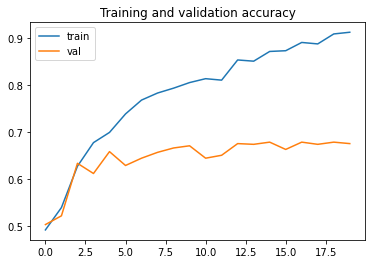

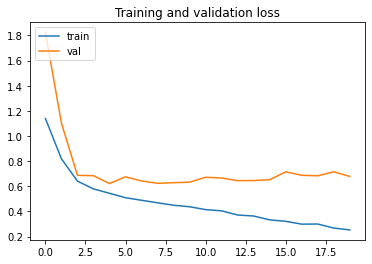

In [147]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
# plt.legend(['train'], loc='upper left')


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
# plt.legend(['train'], loc='upper left')

## Testing

In [148]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

644/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.68944097
